### CHILUKURI RISHITHA
### AP19110010441
### CSE-F

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import joblib

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head(n=10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [107]:
#exploring data
df.dtypes

Gender            int64
Age               int64
Annual_income     int64
Spending_score    int64
label             int32
dtype: object

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Gender            200 non-null int64
Age               200 non-null int64
Annual_income     200 non-null int64
Spending_score    200 non-null int64
label             200 non-null int32
dtypes: int32(1), int64(4)
memory usage: 7.1 KB


In [109]:
#preprocessing
df.isnull().sum()

Gender            0
Age               0
Annual_income     0
Spending_score    0
label             0
dtype: int64

In [5]:
df = df.rename(columns={'Annual Income (k$)': 'Annual_income', 'Spending Score (1-100)': 'Spending_score','Genre':'Gender'})

In [6]:
df.head()

,CustomerID,Gender,Age,Annual_income,Spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.drop('CustomerID',axis=1,inplace=True)
df.head()

,Gender,Age,Annual_income,Spending_score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [8]:
df['Gender'].replace(['Female','Male'], [0,1],inplace=True)

In [9]:
df.isnull().sum()

Gender            0
Age               0
Annual_income     0
Spending_score    0
dtype: int64

In [10]:
#EDA VISUALIZATION
import matplotlib.pyplot as plt 
import seaborn as sns 

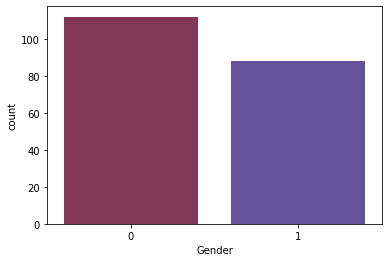

In [11]:
sns.countplot(x='Gender',data=df,palette="twilight_r")

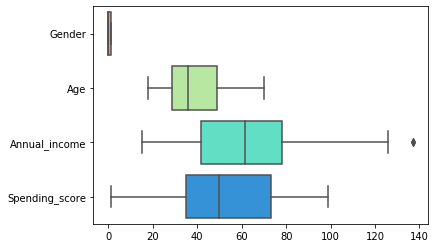

In [13]:
sns.boxplot(data=df,orient='h',palette='rainbow_r')

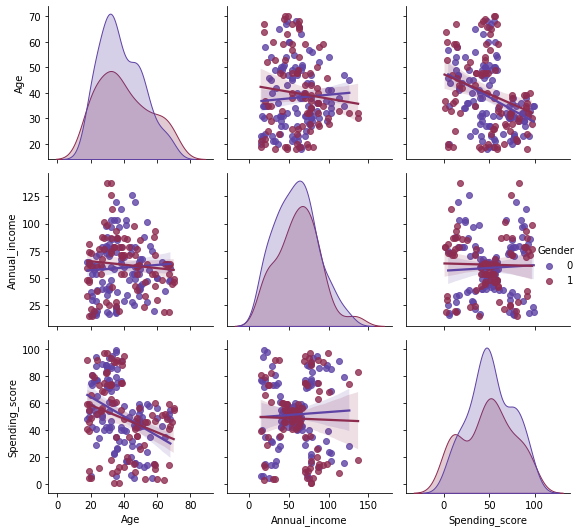

In [14]:
sns.pairplot(df,  kind ="reg", hue = "Gender", palette="twilight")
plt.tight_layout()

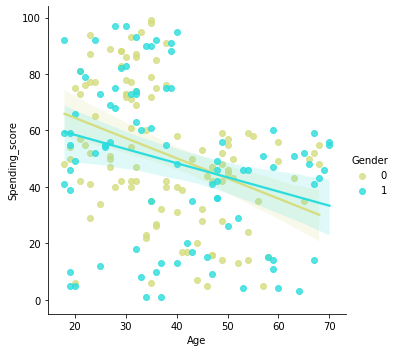

In [15]:
sns.lmplot(x = "Age", y = "Spending_score", data = df, hue = "Gender",palette="rainbow_r")

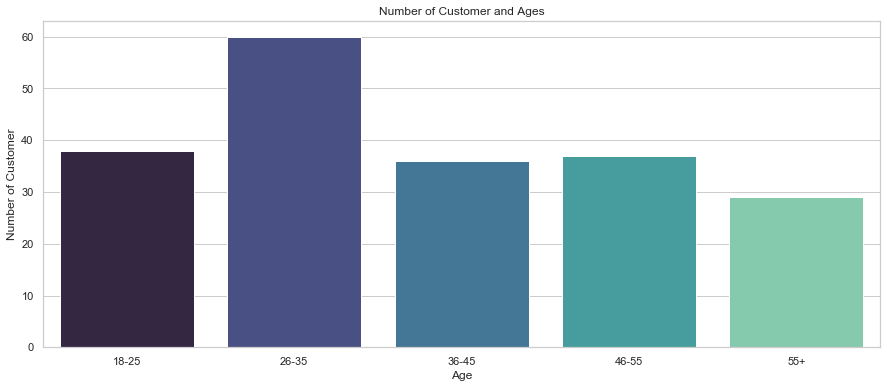

In [44]:
age_18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age_26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age_36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age_46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age_55above = df.Age[df.Age >= 56]

agex = ["18-25","26-35","36-45","46-55","55+"] 
agey = [len(age_18_25.values), len(age_26_35.values), len(age_36_45.values), len(age_46_55.values), len(age_55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=agex, y=agey, palette="mako") 
plt.title("Number of Customer and Ages")
plt.xlabel ("Age")
plt.ylabel("Number of Customer")
plt.show()

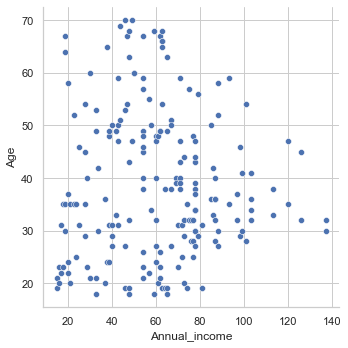

In [53]:
sns.relplot(x='Annual_income', y='Age', data=df) 

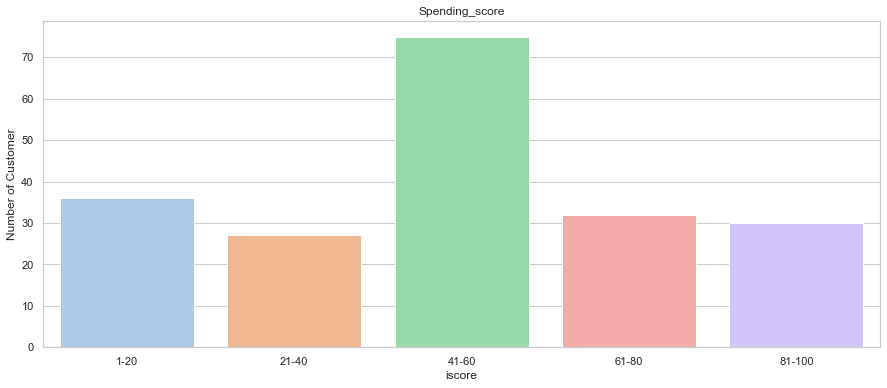

In [61]:
ss_1_20 = df['Spending_score'] [(df['Spending_score'] >= 1) & (df['Spending_score'] <= 20)]
ss_21_40 = df['Spending_score'] [(df['Spending_score'] >= 21) & (df['Spending_score'] <= 40)]
ss_41_60 = df['Spending_score'] [(df['Spending_score'] >= 41) & (df['Spending_score'] <= 60)]
ss_61_80 = df['Spending_score'] [(df['Spending_score'] >= 61) & (df['Spending_score'] <= 80)]
ss_81_100 = df['Spending_score'] [(df['Spending_score'] >= 81) & (df['Spending_score'] <= 100)]


ssx=["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy=[len(ss_1_20.values), len(ss_21_40.values), len(ss_41_60.values), len(ss_61_80.values), len(ss_81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="pastel") 
plt.title('Spending_score')
plt.xlabel ('iscore')
plt.ylabel("Number of Customer")
plt.show()

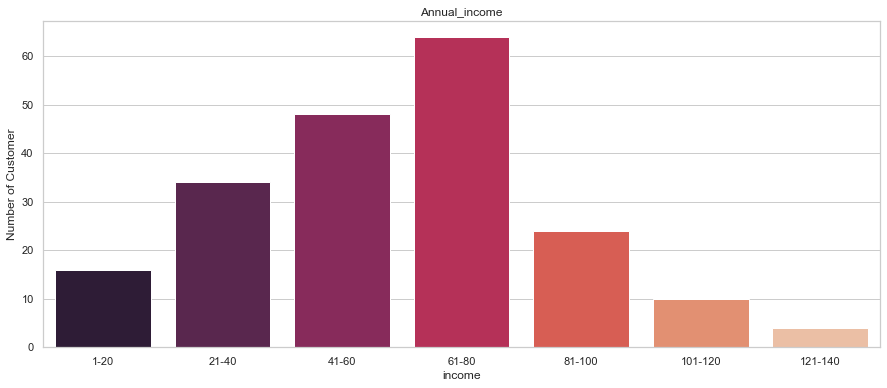

In [59]:
ai_1_20 = df['Annual_income'] [(df['Annual_income'] >= 1) & (df['Annual_income'] <= 20)]
ai_21_40 = df['Annual_income'] [(df['Annual_income'] >= 21) & (df['Annual_income'] <= 40)]
ai_41_60 = df['Annual_income'] [(df['Annual_income'] >= 41) & (df['Annual_income'] <= 60)]
ai_61_80 = df['Annual_income'] [(df['Annual_income'] >= 61) & (df['Annual_income'] <= 80)]
ai_81_100 = df['Annual_income'] [(df['Annual_income'] >= 81) & (df['Annual_income'] <= 100)]
ai_101_120 = df['Annual_income'] [(df['Annual_income'] >= 101) & (df['Annual_income'] <= 120)]
ai_121_140 = df['Annual_income'] [(df['Annual_income'] >= 121) & (df['Annual_income'] <= 140)]

aix=["1-20", "21-40", "41-60", "61-80", "81-100", "101-120", "121-140"]
aiy=[len(ai_1_20.values), len(ai_21_40.values), len(ai_41_60.values), len(ai_61_80.values), len(ai_81_100.values), len(ai_101_120.values), len(ai_121_140.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="rocket") 
plt.title('Annual_income')
plt.xlabel ('income')
plt.ylabel("Number of Customer")
plt.show()

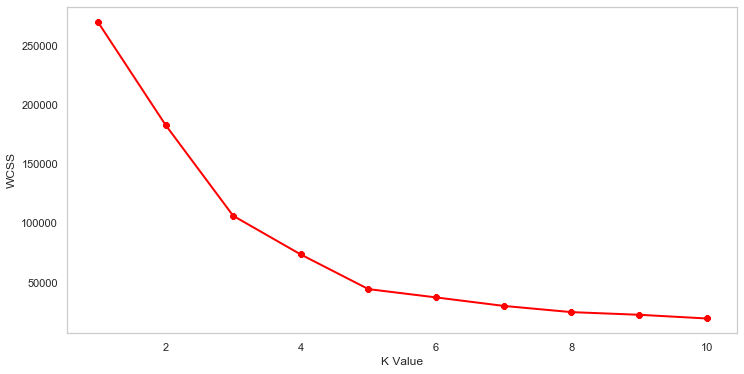

In [101]:
#KMEANS-ELBOW METHOD-CLUSTERING
x1=df.loc[:, ["Annual_income","Spending_score"]].values

from sklearn.cluster import KMeans
wcss = []
for k in range (1,11):
    kmeans = KMeans (n_clusters=k, init="k-means++")
    kmeans.fit (x1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range (1,11),wcss, linewidth=2, color="red", marker="8")
plt.xlabel ("K Value")
plt.ylabel("WCSS")
plt.show()

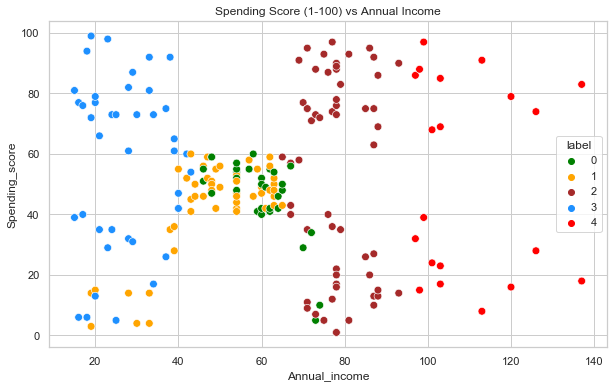

In [114]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual_income',y = 'Spending_score',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df  ,s = 60 )
plt.xlabel('Annual_income')
plt.ylabel('Spending_score') 
plt.title('Spending Score (1-100) vs Annual Income')
plt.show()